In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as PP
from pandas_profiling import ProfileReport

df = pd.read_csv('C:/PY/sf_ds/EDA/wine1.csv')
display(df.head(2))
#display(df.info())
display("Число уникальных дегустаторов ",df['taster_name'].nunique())
display("Максимальная цена за бутылку составила ",df['price'].max())
#df1=df.drop_duplicates(subset=['description'])
#display(df.nunique())
#df.drop_duplicates(subset=['description'])
#display(df.info())
#display(df1.info())
mask = df.duplicated(subset=df.columns) # маска для фильтрации
df1 = df[mask] # фильтруем наш датасет
display(df1.info())
df1=df1.drop('designation',axis=1)
df1=df1.drop('region_2',axis=1)
display(df1.head(2))
profile = ProfileReport(df1, title="Wine Pandas Profiling Report")


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


'Число уникальных дегустаторов '

19

'Максимальная цена за бутылку составила '

3300.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 2408 to 129913
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                9979 non-null   object 
 1   description            9983 non-null   object 
 2   designation            7063 non-null   object 
 3   points                 9983 non-null   int64  
 4   price                  9382 non-null   float64
 5   province               9979 non-null   object 
 6   region_1               8296 non-null   object 
 7   region_2               3742 non-null   object 
 8   taster_name            8656 non-null   object 
 9   taster_twitter_handle  8216 non-null   object 
 10  title                  9983 non-null   object 
 11  variety                9983 non-null   object 
 12  winery                 9983 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 662.9+ KB


None

,country,description,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
2408,US,"This is weighty, creamy and medium to full in ...",85,14.0,California,North Coast,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
2409,Italy,There's a touch of toasted almond at the start...,85,13.0,Sicily & Sardinia,Sicilia,NaN,NaN,Tasca d'Almerita 2011 Sallier de la Tour Grill...,Grillo,Tasca d'Almerita


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics



#import pandas_profiling as PP
#from pandas_profiling import ProfileReport

df = pd.read_csv('C:/PY/sf_ds/EDA/wine2.csv')
display(df.head(2))
#display(df['points'].min())
#display(statistics.mean(df['price']))
#display(df['price'].mean())
display(statistics.mode(df['price']))
display(df['price'].median())
display(df.corr(method = 'kendall'))

"""plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot
plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака
plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout
plt.show() # просмотр графика"""

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


35.363389129985535

28.0

C:\Users\Admin\AppData\Local\Temp\ipykernel_4336\1349244533.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr(method = 'kendall'))


,Unnamed: 0,points,price
Unnamed: 0,1.000000,0.006536,0.002533
points,0.006536,1.000000,0.433498
price,0.002533,0.433498,1.000000


"plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов\nstats.probplot(df['points'], plot=plt) # qq plot\nplt.subplot(1, 2, 2) # располагаем второй рисунок рядом\nplt.hist(df['points']) # гистограмма распределения признака\nplt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout\nplt.show() # просмотр графика"

In [14]:
from sklearn.metrics import matthews_corrcoef
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

,Month,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
0,December,1953,24.000000,36.000000,65.000000,118.000000,19.630000,0.670000
1,January,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
2,February,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916
3,March,1954,24.000000,35.000000,66.000000,118.000000,19.040000,0.690000
4,April,1954,23.433172,34.698708,66.057258,114.936066,18.232168,0.677916


C:\Users\Admin\AppData\Local\Temp\ipykernel_4336\2174393714.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<AxesSubplot: >

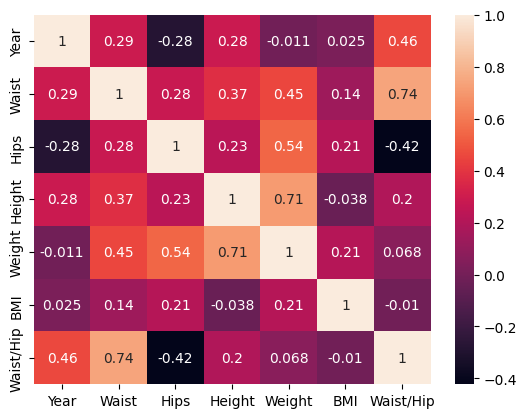

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import seaborn as sns


#import pandas_profiling as PP
#from pandas_profiling import ProfileReport

df = pd.read_csv('C:/PY/sf_ds/EDA/model.csv')
display(df.head())
#display(df.corr())
#sns.heatmap(df.corr(), annot = True)
#sns.scatterplot(data=df, x="Waist/Hip", y="Waist")

#sns.scatterplot(data=df, x="Weight", y="Year")
#sns.pairplot(df)
#display(statistics.mean(df['Height']))
sns.heatmap(df.corr(), annot = True)

In [42]:
import pandas as pd
from pandas_profiling import ProfileReport
import sweetviz as sv
import dtale
df = pd.read_csv('C:/PY/sf_ds/EDA/wine2.csv')
#profile = ProfileReport(df, title="Wine Pandas Profiling Report")
#profile
#report = sv.analyze(df)
#report.show_html()
d = dtale.show(df)
d


c:\Users\Admin\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\Admin\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: Unnamed: 0                          |▋         | [  7%]   00:00 -> (00:06 left)c:\Users\Admin\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
Feature: coun

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
